# Reshaping Data with Transformations

![Four Normalizing Transformations](Images/Four_Normalizing_Transformations.png)

### Import Libraries: 
In the first cell, run the following code to import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)


### Generate Skewed Data:
In the next cell, define a function to generate skewed data and create your datasets.
![Skewed](Skew.png)

In [2]:
# Function to generate a skewed dataset
def generate_skewed_data(size, skew_type='positive'):
    if skew_type == 'positive':
        return np.random.exponential(scale=1, size=size)  # Positive skew
    elif skew_type == 'negative':
        return -np.random.exponential(scale=1, size=size)  # Negative skew
    else:
        return np.random.normal(loc=0, scale=1, size=size)  # Normal distribution

# Generate datasets
size = 100
data_positive_skew = generate_skewed_data(size, 'positive')


### Generate Kurtosis Data:
In the next cell, define a function to generate kurtosis data and create your datasets.
![Kurtosis](Kurtosis.png)

In [3]:
# Generate kurtosis dataset using Laplace distribution
data_high_kurtosis = np.random.laplace(loc=0, scale=1, size=size)

### Apply Transformations: 
In a new cell, apply the transformations to the skewed data.

In [4]:
# Logarithmic Transformation
log_transformed = np.log10(data_positive_skew + 1)  # Add 1 to avoid log(0)

# Cube Root Transformation
cube_root_transformed = np.cbrt(data_positive_skew)

# Square Root Transformation
square_root_transformed = np.sqrt(data_positive_skew)


### Create DataFrames and Save as CSV: 
In another cell, create DataFrames and save them to CSV files.

In [5]:
# Create DataFrames for each transformation
df_logs = pd.DataFrame({
    "Data Before Log Transformation": data_positive_skew,
    "Data After Log Transformation": log_transformed
})

df_cube_root = pd.DataFrame({
    "Data Before Cube Root Transformation": data_positive_skew,
    "Data After Cube Root Transformation": cube_root_transformed
})

df_square_root = pd.DataFrame({
    "Data Before Square Root Transformation": data_positive_skew,
    "Data After Square Root Transformation": square_root_transformed
})

# Save DataFrames to CSV
df_logs.to_csv("csv/Data_Logs.csv", index=False)
df_cube_root.to_csv("csv/Data_Cube_Root.csv", index=False)
df_square_root.to_csv("csv/Data_Square_Root.csv", index=False)

# Create DataFrame for high kurtosis data
df_kurtosis = pd.DataFrame({
    "Data Before Kurtosis Transformation": data_high_kurtosis
})

# Save kurtosis dataset to CSV
df_kurtosis.to_csv("csv/Data_High_Kurtosis.csv", index=False)


### Generate Frequency Tables: 
In a new cell, create and display the frequency tables,

In [6]:
# Generate frequency tables
freq_table_logs = df_logs.value_counts().reset_index(name='Frequency')
freq_table_cube_root = df_cube_root.value_counts().reset_index(name='Frequency')
freq_table_square_root = df_square_root.value_counts().reset_index(name='Frequency')

# Print frequency tables
print("Frequency Table for Log Transformation:")
print(freq_table_logs)

print("\nFrequency Table for Cube Root Transformation:")
print(freq_table_cube_root)

print("\nFrequency Table for Square Root Transformation:")
print(freq_table_square_root)


Frequency Table for Log Transformation:
    Data Before Log Transformation  Data After Log Transformation  Frequency
0                         0.005537                       0.002398          1
1                         0.020799                       0.008940          1
2                         0.025748                       0.011041          1
3                         0.034994                       0.014938          1
4                         0.046282                       0.019649          1
..                             ...                            ...        ...
95                        3.010121                       0.603158          1
96                        3.370630                       0.640544          1
97                        3.492807                       0.652518          1
98                        3.503557                       0.653556          1
99                        4.334146                       0.727065          1

[100 rows x 3 columns]

Frequency T

### Plot Histograms: 
Finally, create a function to plot histograms and visualize the distributions.

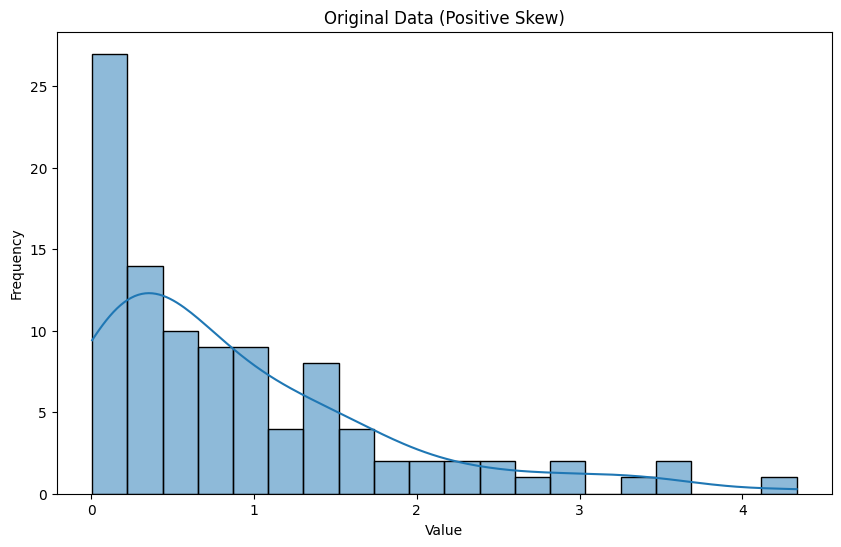

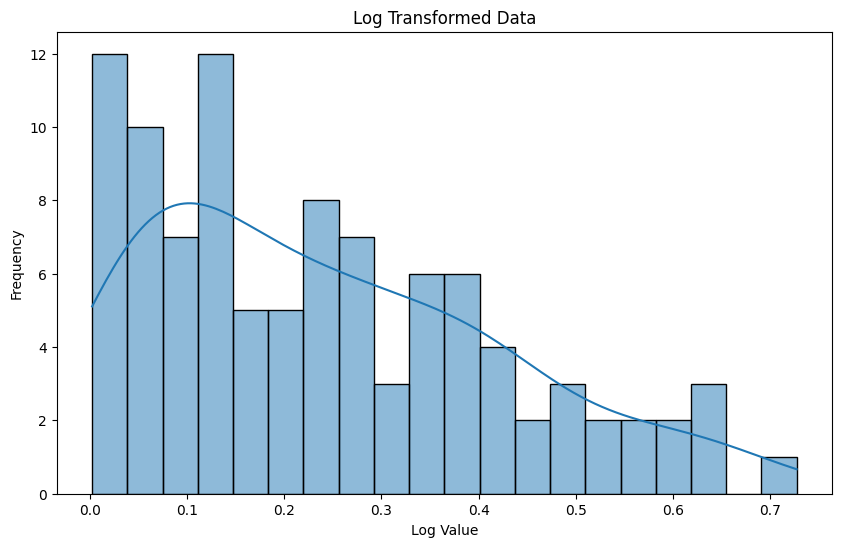

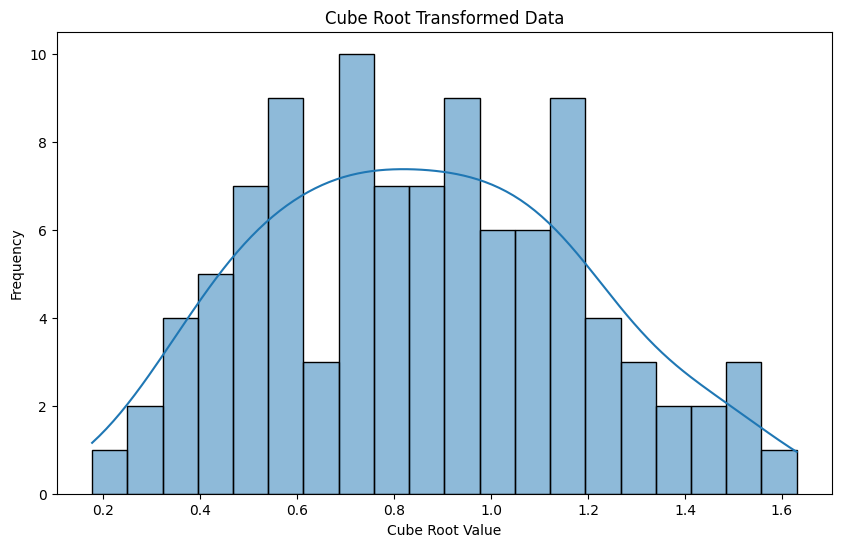

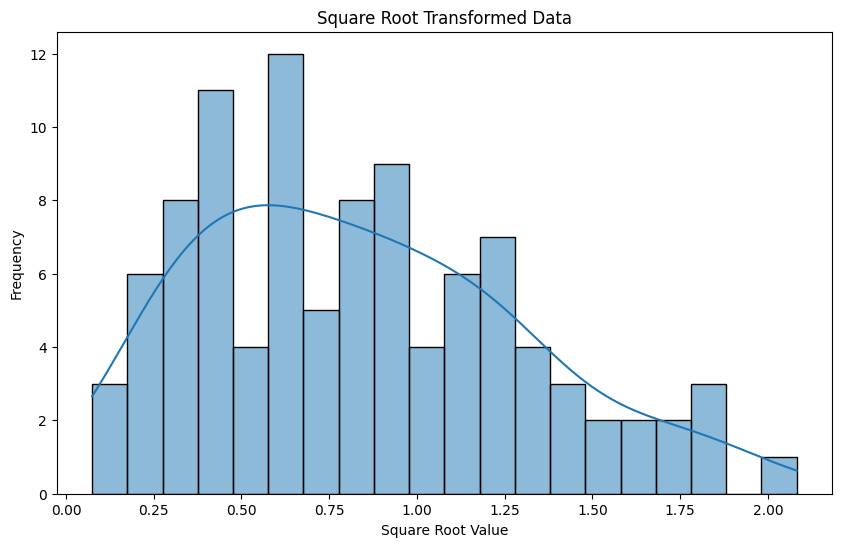

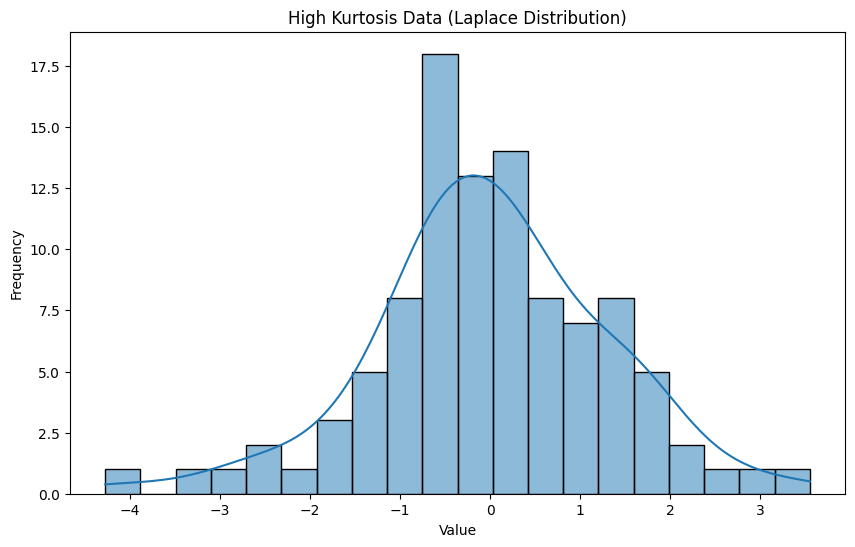

In [7]:
# Function to plot histograms
def plot_histogram(data, title, xlabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=20, kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

# Plot histograms for original and transformed data
plot_histogram(data_positive_skew, 'Original Data (Positive Skew)', 'Value')
plot_histogram(log_transformed, 'Log Transformed Data', 'Log Value')
plot_histogram(cube_root_transformed, 'Cube Root Transformed Data', 'Cube Root Value')
plot_histogram(square_root_transformed, 'Square Root Transformed Data', 'Square Root Value')

# Plot histogram for high kurtosis dataset
plot_histogram(data_high_kurtosis, 'High Kurtosis Data (Laplace Distribution)', 'Value')
